#CHALLENGE: Telecom X, Análisis de evasión de clientes.

#📌 Extracción

In [2]:
#Importación de bibliotecas
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
#Carga de la tabla con datos
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

##Diccionario de datos
* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente

In [4]:
#Información de filas y columnas
df.shape

(7267, 6)

In [5]:
#Información de encabezados de la tabla
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [6]:
#Normalización de la tabla
from pandas import json_normalize
df_normalizado = pd.json_normalize(data)
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [7]:
#Encabezado de tabla normalizada
df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
# Verificación de valores únicos
for col in df_normalizado.columns:
  print(f"valores únicos en la columna'{col}': {df_normalizado[col].nunique()}")
  if df_normalizado[col].nunique() < 20:
    print(df_normalizado[col].unique())
    print(' ' * 50)

valores únicos en la columna'customerID': 7267
valores únicos en la columna'Churn': 3
['No' 'Yes' '']
                                                  
valores únicos en la columna'customer.gender': 2
['Female' 'Male']
                                                  
valores únicos en la columna'customer.SeniorCitizen': 2
[0 1]
                                                  
valores únicos en la columna'customer.Partner': 2
['Yes' 'No']
                                                  
valores únicos en la columna'customer.Dependents': 2
['Yes' 'No']
                                                  
valores únicos en la columna'customer.tenure': 73
valores únicos en la columna'phone.PhoneService': 2
['Yes' 'No']
                                                  
valores únicos en la columna'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
                                                  
valores únicos en la columna'internet.InternetService': 3
['DSL' 'Fiber optic' 'No'

In [9]:
#Verificación de valores en blanco o vacíos
blancos_vacios = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
blancos_vacios

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [10]:
#Valores nulos
print("Valores nulos:", df_normalizado.isnull().sum())

Valores nulos: customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [11]:
# Valores duplicados
print("Lineas duplicadas:", df_normalizado.duplicated().sum())

Lineas duplicadas: 0


In [12]:
#Eliminación de columnas Churn vacías
df_normalizado = df_normalizado[df_normalizado['Churn'].str.strip() != '']

In [13]:
#Cambio de tipo columna account.Charges.Total
df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')

In [14]:
#Verificación de cambio a Float
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [15]:
#Verificación de blancos o vacíos
blancos_vacios = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
blancos_vacios

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [16]:
#Cambio de nombres de columnas
df_normalizado.rename(columns={
    "customerID": "customerID",
    "Churn": "Churn",
    "customer.gender": "gender",
    "customer.SeniorCitizen": "SeniorCitizen",
    "customer.Partner": "Partner",
    "customer.Dependents": "Dependents",
    "customer.tenure": "tenure",
    "phone.PhoneService": "PhoneService",
    "phone.MultipleLines": "MultipleLines",
    "internet.InternetService": "InternetService",
    "internet.OnlineSecurity": "OnlineSecurity",
    "internet.OnlineBackup": "OnlineBackup",
    "internet.DeviceProtection": "DeviceProtection",
    "internet.TechSupport": "TechSupport",
    "internet.StreamingTV": "StreamingTV",
    "internet.StreamingMovies": "StreamingMovies",
    "account.Contract": "Contract",
    "account.PaperlessBilling": "PaperlessBilling",
    "account.PaymentMethod": "PaymentMethod",
    "account.Charges.Monthly": "Charges.Monthly",
    "account.Charges.Total": "Charges.Total"
}, inplace=True)

In [17]:
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [18]:
#Creación de columna Cuentas diarias
df_normalizado["Cuentas_Diarias"] = (df_normalizado["Charges.Monthly"] / 30).round(3)

In [19]:
df_normalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.187
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.997
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.267
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.797


In [20]:
df_normalizado['Cuentas_Diarias'].dtype

dtype('float64')

In [21]:
#Exportar df_normalizado a CSV
df_normalizado.to_csv("TelecomX_normalizado", index=False)
df_normalizado

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.187
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.997
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.267
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.837
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.677
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.262


#📊 Carga y análisis

In [22]:
df_normalizado.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158727
std,0.368612,24.559481,30.090047,2266.771362,1.003005
min,0.000000,0.000000,18.250000,18.800000,0.608000
25%,0.000000,9.000000,35.500000,401.450000,1.183000
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958000


In [23]:
#Proporción de cancelaciones de servicios
df_normalizado["Churn"].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


In [57]:
px.histogram(df_normalizado, x = 'Churn', text_auto = True, color = 'Churn', title="Cantidad de clientes que cancelan")

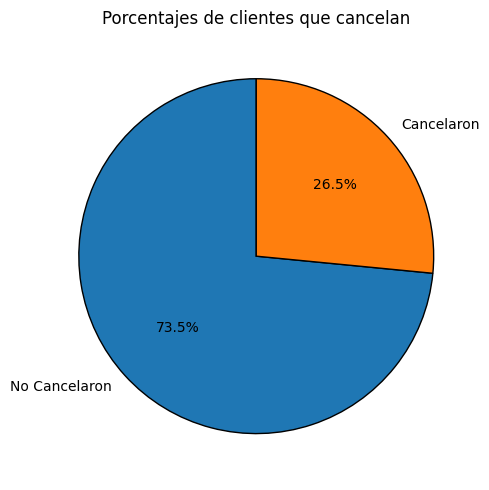

In [46]:
valores = df_normalizado['Churn'].value_counts()
etiquetas = ['No Cancelaron', 'Cancelaron']

plt.figure(figsize=(5, 5))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Porcentajes de clientes que cancelan', fontsize=12)
plt.axis('equal')
plt.tight_layout()

plt.show()

In [59]:
px.histogram(df_normalizado, x = 'tenure', text_auto = True, color = 'Churn', barmode = 'group', title="Cancelaciones por duración del contrato (meses)")

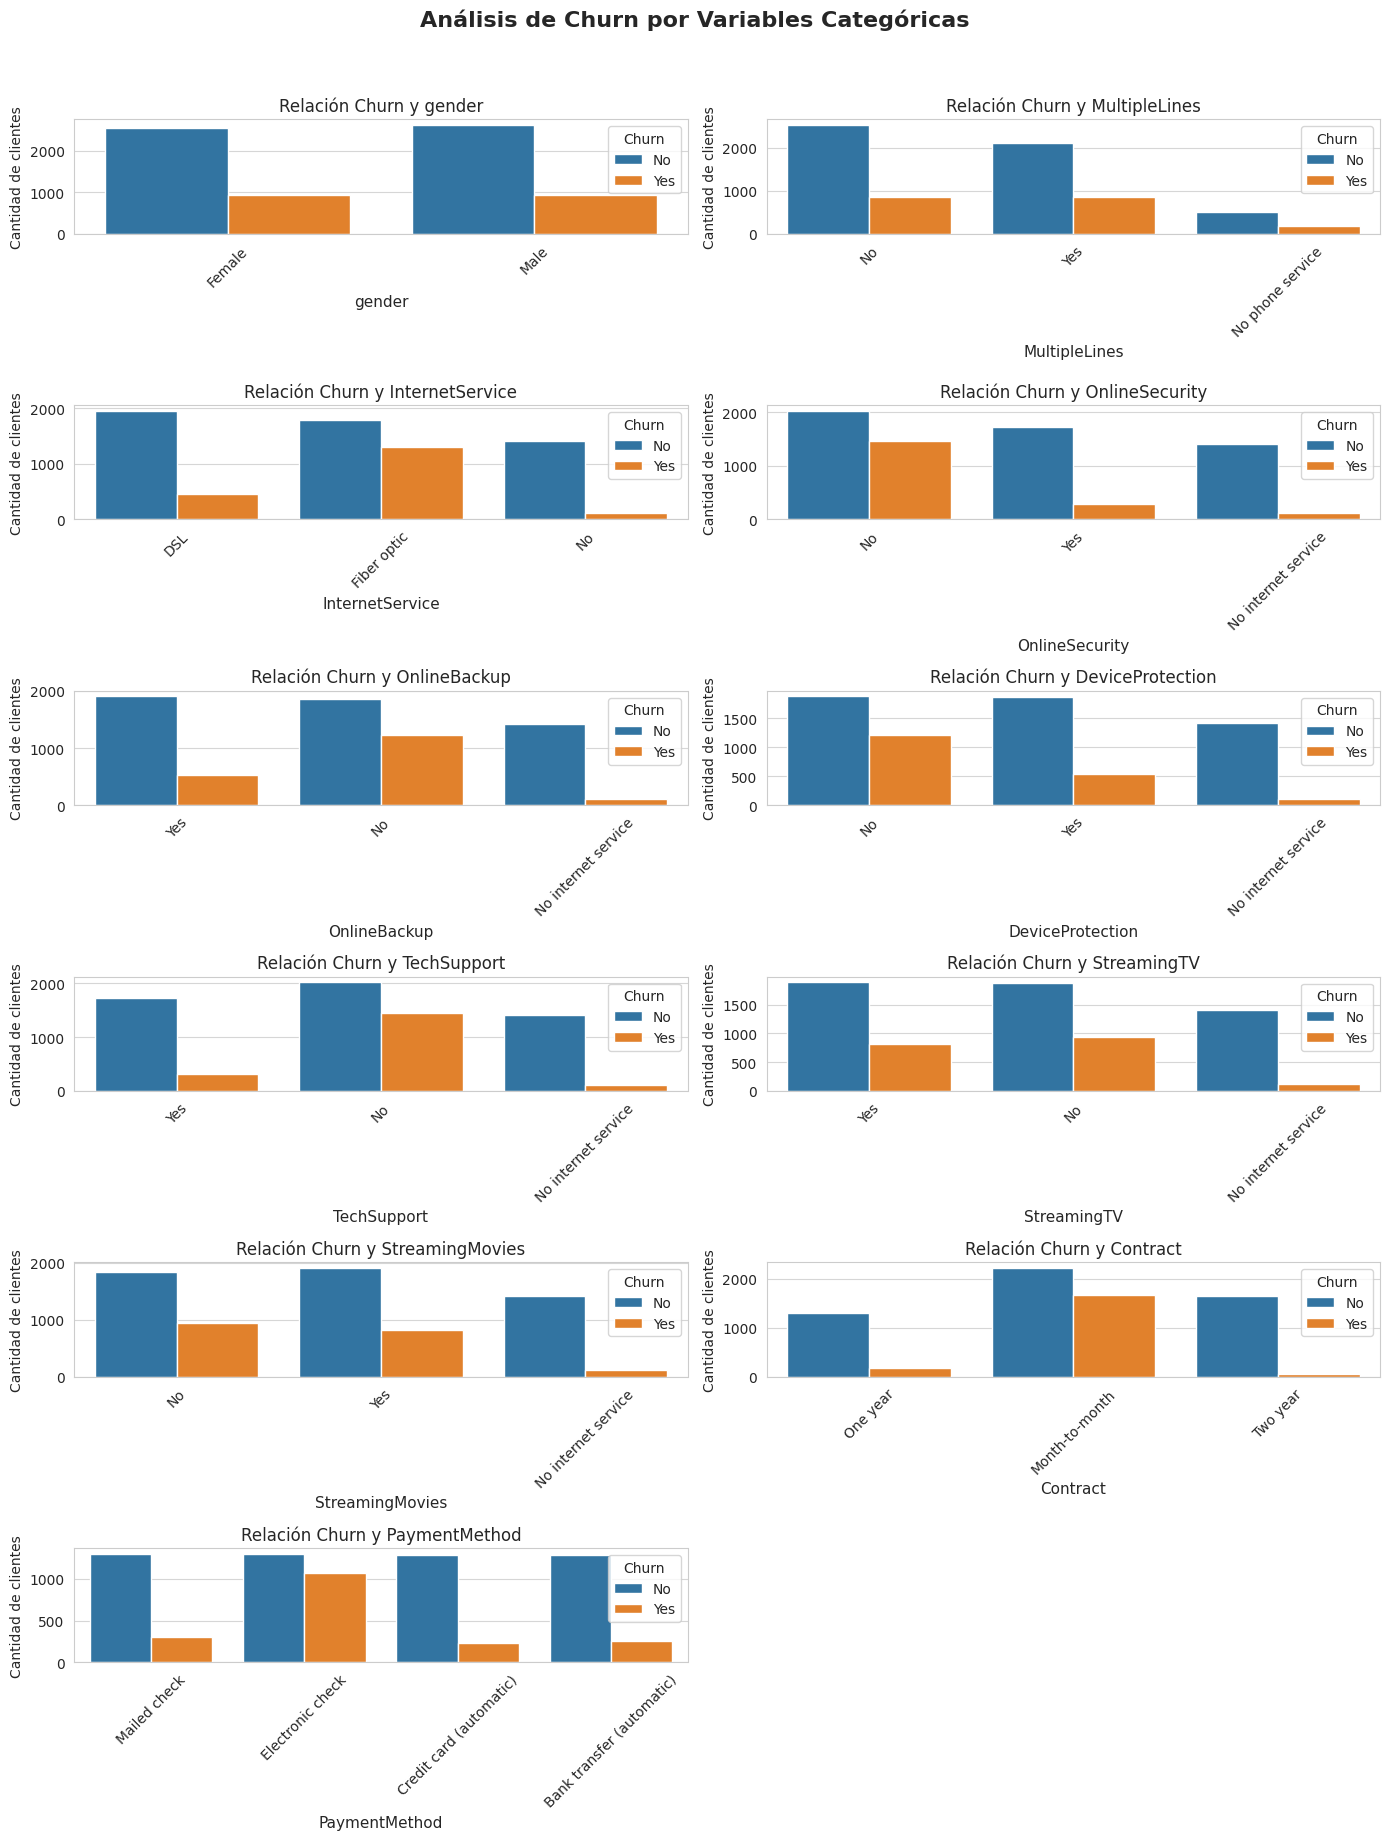

In [60]:
columnas_categoricas = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity',	'OnlineBackup',
                        'DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies',	'Contract',
                        'PaymentMethod']

numero_columnas = 2
numero_filas = (len(columnas_categoricas) + numero_columnas - 1) // numero_columnas # Ensure enough rows for all plots
fig, ax = plt.subplots(numero_filas, numero_columnas, figsize=(numero_columnas*7, numero_filas*3))
ax = ax.flatten()
plt.suptitle('Análisis de Churn por Variables Categóricas', fontsize=16, y=1.02, fontweight = 'bold')

for i, columna in enumerate(columnas_categoricas):
  if i < len(ax):

    sns.countplot(x=columna, hue='Churn', data=df_normalizado, ax=ax[i])
    ax[i].set_title(f'Relación Churn y {columna}', fontsize = 12)
    ax[i].set_xlabel(columna, fontsize = 11)
    ax[i].set_ylabel('Cantidad de clientes')
    ax[i].tick_params(axis='x', rotation=45)
    ax[i].legend(title='Churn', labels=['No', 'Yes'])
    ax[i].grid(axis='y', linestyle='-', alpha=0.8)

# Ocultar los subplots vacíos si los hay
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.subplots_adjust(top=1.2, right=0.8)
plt.tight_layout()
plt.show()

#📄Informe final